In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#load() is generally used in libraries like NumPy or SciPy to load data from various file formats into appropriate data structures (like arrays).
#read_csv() is specific to pandas and is used specifically for reading data from CSV files into pandas DataFrames.
df=pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Packge (in lpa)')

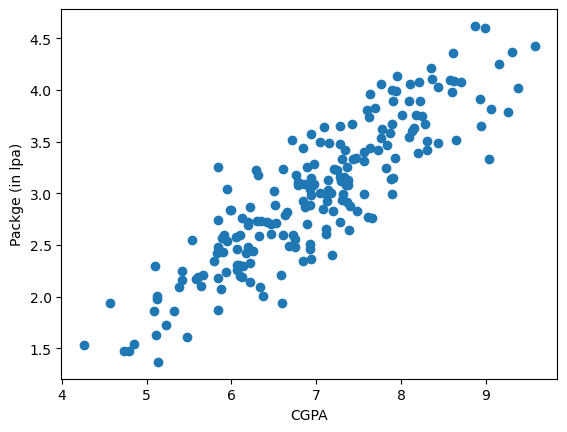

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Packge (in lpa)')

In [5]:
#INPUT COLUMNS AND OUTPUT COLUNS SHOULD BE SEPERATED
x=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [17]:
#So, by setting random_state=2, you're essentially saying, "I want to split my candies using the magic number 2."
#This ensures that every time you run the code, you'll always get the same groups of candies for training and testing.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.05,random_state=2)

In [9]:
from sklearn.linear_model import LinearRegression 

In [18]:
#Creating object
lr=LinearRegression()

In [19]:
#fit() is used to train the model
lr.fit(x_train,y_train)

LinearRegression()

In [21]:
x_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [20]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
Name: package, dtype: float64

In [25]:
# we train the algorithm with (1,1) which means 1 row and 1 col 
lr.predict(x_test.iloc[0].values.reshape(1,1))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.88709148])

Text(0, 0.5, 'Packge (in lpa)')

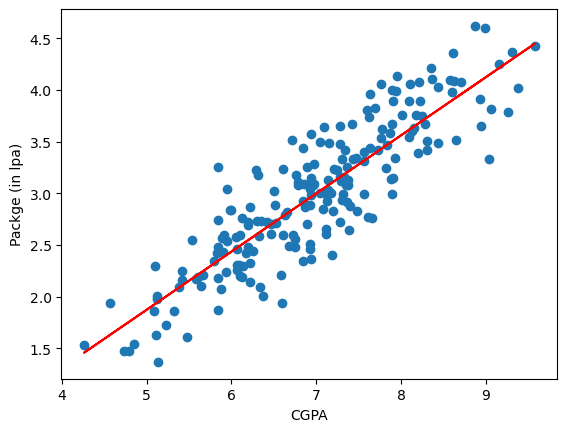

In [26]:
#Showing the regression line in the graph
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Packge (in lpa)')

In [32]:
#y=mx+b
m=lr.coef_

In [30]:
b=lr.intercept_
b

-0.9362451094045743

In [34]:
#y=mx+b

y=m*8.58+b
y

array([3.88709148])

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [41]:
y_pred=lr.predict(x_test)

In [39]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87])

In [42]:
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 0.2595308359022752


In [43]:
print('MSE',mean_squared_error(y_test,y_pred))

MSE 0.0792628142488345


In [44]:
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.28153652382743255


In [47]:
r2=r2_score(y_test,y_pred)
print('r2',r2_score(y_test,y_pred))

r2 0.9047075695656516


In [46]:
x_test.shape

(10, 1)

In [48]:
1-((1-r2)*(40-1)/(40-1-1))

0.9021998740279056